In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle

In [68]:
def save_model(model,filename):
    pickle.dump(model, open('models/'+filename, 'wb'))

def Model_score(filename):
    loaded_model = pickle.load(open('models/'+filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    return result

In [20]:
LR_pipe = Pipeline([('logistic',LogisticRegression())])
LR_pipe.fit(X_train,y_train)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logistic', LogisticRegression())])

In [23]:
save_model(LR_pipe,'LogisticRegression.sav')

In [22]:
DC_pipe = Pipeline([('Decision',DecisionTreeClassifier(random_state=0))])
DC_pipe.fit(X_train,y_train)

Pipeline(steps=[('Decision', DecisionTreeClassifier(random_state=0))])

In [19]:
save_model(DC_pipe,'DecisionTree.sav')

In [82]:
from sklearn.model_selection import GridSearchCV
param4 = {}
param4['max_depth'] = [5,10,25,None]
param4['min_samples_split'] = [2,5,10]
param4['class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# parameters = {'criterion':['gini'], 'splitter':['best'], 'min_samples_split':[100,200,300,400,500,600,700,800,900], 'random_state':[42]}
clf = GridSearchCV(DecisionTreeClassifier(),param4, cv = 10, return_train_score=False)

In [83]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, {0: 1, 1: 5}, {0: 1, 1: 10},
                                          {0: 1, 1: 25}],
                         'max_depth': [5, 10, 25, None],
                         'min_samples_split': [2, 5, 10]})

In [88]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [89]:
save_model(clf,'ParameterTuned_DecisionTree.sav')

In [86]:
clf_df = pd.DataFrame(clf.cv_results_)
clf_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.294948,0.014774,0.004562,0.000651,None,5,2,"{'class_weight': None, 'max_depth': 5, 'min_samples_split': 2}",0.831658,0.825213,...,0.825900,0.826674,0.825814,0.831830,0.823150,0.823565,0.831643,0.826825,0.003412,4
1,0.297602,0.004763,0.004612,0.000492,None,5,5,"{'class_weight': None, 'max_depth': 5, 'min_samples_split': 5}",0.831658,0.825213,...,0.825900,0.826674,0.825814,0.831830,0.823150,0.823565,0.831643,0.826825,0.003412,4
2,0.292690,0.004518,0.004412,0.000491,None,5,10,"{'class_weight': None, 'max_depth': 5, 'min_samples_split': 10}",0.831658,0.825213,...,0.825900,0.826674,0.825814,0.831830,0.823150,0.823565,0.831643,0.826825,0.003412,4
3,0.553795,0.008834,0.005364,0.000452,None,10,2,"{'class_weight': None, 'max_depth': 10, 'min_samples_split': 2}",0.833033,0.829080,...,0.828134,0.827705,0.832173,0.833548,0.826674,0.830354,0.833792,0.830117,0.002694,1
4,0.558210,0.009318,0.005164,0.000321,None,10,5,"{'class_weight': None, 'max_depth': 10, 'min_samples_split': 5}",0.832861,0.829423,...,0.828220,0.827275,0.832431,0.833119,0.826416,0.830268,0.834221,0.830048,0.002821,2


In [87]:
print('Best Score :',clf.best_score_,'Best Params :',clf.best_params_)

Best Score : 0.8301165605031755 Best Params : {'class_weight': None, 'max_depth': 10, 'min_samples_split': 2}


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
# clf2 = SVC(probability=True, random_state=42)
# clf3 = LogisticRegression(random_state=42)
# clf4 = DecisionTreeClassifier(random_state=42)
# clf5 = KNeighborsClassifier()
# clf6 = MultinomialNB()
# clf7 = GradientBoostingClassifier(random_state=42)

In [42]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
# param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

# param2 = {}
# param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
# param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param2['classifier'] = [clf2]

# param3 = {}
# param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
# param3['classifier__penalty'] = ['l1', 'l2']
# param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param3['classifier'] = [clf3]

# param4 = {}
# param4['classifier__max_depth'] = [5,10,25,None]
# param4['classifier__min_samples_split'] = [2,5,10]
# param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param4['classifier'] = [clf4]

# param5 = {}
# param5['classifier__n_neighbors'] = [2,5,10,25,50]
# param5['classifier'] = [clf5]

# param6 = {}
# param6['classifier__alpha'] = [10**0, 10**1, 10**2]
# param6['classifier'] = [clf6]

# param7 = {}
# param7['classifier__n_estimators'] = [10, 50, 100, 250]
# param7['classifier__max_depth'] = [5, 10, 20]
# param7['classifier'] = [clf7]

In [43]:
pipeline = Pipeline([('RandomForest', clf1)])
# params = [param1, param2, param3, param4, param5, param6, param7]
params = [param1]

In [44]:
from sklearn.model_selection import GridSearchCV
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [45]:
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [46]:
save_model(gs,'RandomForest.sav')

In [90]:
import os

models = os.listdir('models/')

In [91]:
score = []
for i in range(0,len(models)):
    score.append(Model_score(models[i]) * 100)

<BarContainer object of 4 artists>

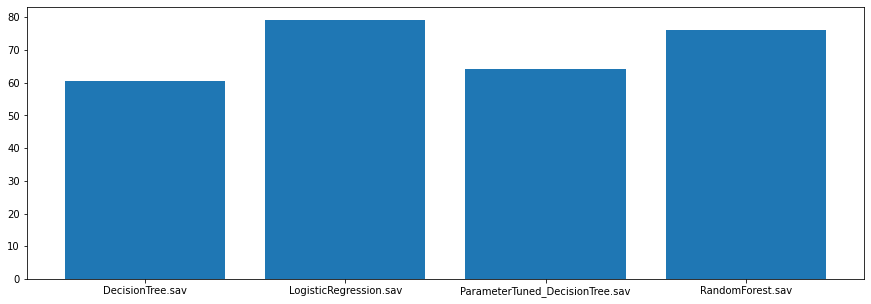

In [92]:
plt.figure(figsize=(15,5))
plt.bar(models,score)